In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
# Membaca data
datacustomer = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Customer.csv", delimiter=';')
datastore = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Store.csv", delimiter=';')
dataproduct = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Product.csv", delimiter=';')
datatransaction = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Transaction.csv", delimiter=';')

In [24]:
# Data Cleansing

# Menghapus duplikat dan mengubah tipe data
# datacustomer
datacustomer = datacustomer.drop_duplicates()
datacustomer = datacustomer.dropna(axis=0)

#datastore
datastore = datastore.drop_duplicates()
datastore = datastore.dropna(axis=0)


#dataproduct
dataproduct = dataproduct.drop_duplicates()
dataproduct = dataproduct.dropna(axis=0)

#datatransaction
datatransation = datatransaction.drop_duplicates()
datatransaction = datatransaction.dropna(axis=0)

#Mengubah tipe data yang belum sesuai
datatransaction['Date'] = pd.to_datetime(datatransaction['Date'])

/var/folders/1l/kv66r7nn0bz1j7vtljz00d400000gp/T/ipykernel_3336/1822436673.py:22: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datatransaction['Date'] = pd.to_datetime(datatransaction['Date'])


In [25]:
# Cek data apakah ada miss data
dataproduct.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [26]:
datastore.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [27]:
datatransation.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [28]:
datacustomer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [31]:
#Menggabungkan data pertama
merged_data = pd.merge(datatransaction, datacustomer, on='CustomerID')

In [32]:
dataclustering = pd.merge(merged_data, dataproduct, on='ProductID')

In [33]:
dataclustering

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500
1,TR20170,165,2022-07-23,P3,7500,2,15000,13,44,1,Married,"14,58",Crackers,7500
2,TR80016,183,2022-01-24,P3,7500,2,15000,10,27,1,Single,"0,18",Crackers,7500
3,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500
4,TR82094,183,2022-09-15,P3,7500,2,15000,1,27,1,Single,"0,18",Crackers,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,TR56886,317,2022-12-13,P4,12000,1,12000,11,55,0,Married,"13,89",Potato Chip,12000
4972,TR19361,348,2022-05-29,P4,12000,3,36000,7,29,1,Married,"4,64",Potato Chip,12000
4973,TR35558,192,2022-12-09,P4,12000,2,24000,10,26,0,Single,"4,47",Potato Chip,12000
4974,TR27321,441,2022-11-08,P4,12000,2,24000,10,19,0,Single,"2,66",Potato Chip,12000


In [34]:
#Melakukan data cleansing dengan menyesuaikan tipe data dengan benar
dataclustering['CustomerID'] = dataclustering['CustomerID'].astype(str)
dataclustering['TransactionID'] = dataclustering['TransactionID'].astype(str)
dataclustering['Qty'] = dataclustering['Qty'].astype(float)
dataclustering['TotalAmount'] = dataclustering['TotalAmount'].astype(float)

In [35]:
# Membuat Data Baru untuk Clustering
# Mengelompokkan berdasarkan 'customerID' dan mengagregasi 'transactionID' dengan fungsi count(), 'qty' dengan fungsi sum(), dan 'total_amount' dengan fungsi sum()
df_cluster = dataclustering.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [13]:
# Memilih Variabel untuk Clustering
# Pilih variabel yang akan digunakan untuk clustering
X = df_cluster[['TransactionID', 'Qty', 'TotalAmount']]

In [14]:
# Normalisasi Data
# Jika variabel memiliki skala yang berbeda, normalisasikan data untuk memastikan variabel memiliki pengaruh yang seimbang dalam proses clustering
X_normalized = (X - X.mean()) / X.std()

In [15]:
# Menggunakan K-means Clustering
# Menentukan jumlah cluster yang diinginkan
n_clusters = 4  # Ubah sesuai dengan kebutuhan Anda
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_normalized)


/Users/dwiyulianto/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [36]:
# Menambahkan Label Cluster ke DataFrame
df_cluster['cluster_label'] = kmeans.labels_


In [37]:
# Menampilkan Hasil Clustering
print(df_cluster[['CustomerID', 'cluster_label']])

    CustomerID  cluster_label
0            1              2
1          100              3
2          101              0
3          102              0
4          103              3
..         ...            ...
439         95              0
440         96              3
441         97              3
442         98              3
443         99              3

[444 rows x 2 columns]


In [18]:
# Evaluasi Hasil Clustering
# Melakukan evaluasi hasil clustering menggunakan metrik evaluasi clustering seperti SSE (Sum of Squared Errors)
sse = kmeans.inertia_
print("SSE (Sum of Squared Errors):", sse)

SSE (Sum of Squared Errors): 237.15726358578053


In [38]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount,cluster_label
0,1,17,60.0,623300.0,2
1,100,8,35.0,272400.0,3
2,101,14,44.0,439600.0,0
3,102,15,57.0,423300.0,0
4,103,11,31.0,318200.0,3
...,...,...,...,...,...
439,95,12,43.0,410200.0,0
440,96,12,44.0,355100.0,3
441,97,14,36.0,329500.0,3
442,98,9,34.0,362500.0,3


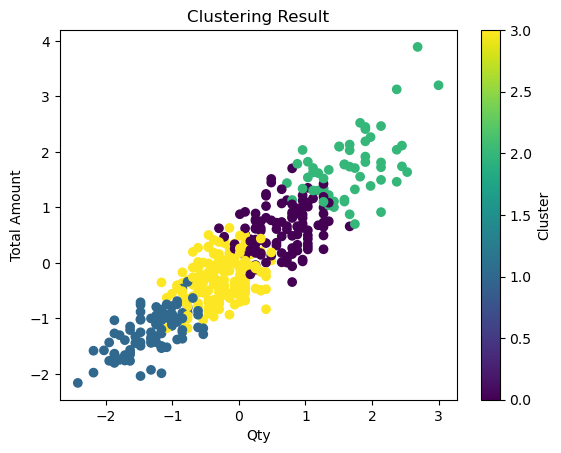

In [39]:
# Visualisasi Hasil Clustering
plt.scatter(X_normalized['Qty'], X_normalized['TotalAmount'], c=df_cluster['cluster_label'], cmap='viridis')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering Result')
plt.colorbar(label='Cluster')
plt.show()

In [40]:
# Menghitung jumlah pelanggan per klaster
cluster_counts = df_cluster['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['cluster_label', 'customer_count']

# Menampilkan hasil jumlah pelanggan per klaster
print(cluster_counts)


   cluster_label  customer_count
0              3             180
1              0             115
2              1              93
3              2              56
